### This code focuses on using XGBoost and Bayesian Optimization to find select metrics


1.   Train the model with Y = "#", x = all numeric metrics that contribute to methodology FT100
2.   After having the first model, apply Bayesian Optimization on model to find better parameters for XGBoost next training
3.   Repeat again step 1, train new model with new parameter
4.   After having the second model:
*   Loop going through all the metrics to find the best combination
*   That combination must have the lowest MAE







## 1. Import Data

In [ ]:
# Import dataset
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
project_dir = 'drive/MyDrive/Capstone/'
dataset = pd.read_excel(project_dir+'FT100.xlsx',sheet_name=['2022','2021','2020','2019','3_years', 'feature_engineer'])
df_dataset= dataset['feature_engineer']

Mounted at /content/drive


In [ ]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Year                                           290 non-null    int64  
 1   #                                              290 non-null    int64  
 2   School Name                                    290 non-null    object 
 3   Programme name                                 290 non-null    object 
 4   Overall satisfaction                           290 non-null    float64
 5   Career service rank                            290 non-null    int64  
 6   Faculty with doctorates (%)                    290 non-null    int64  
 7   Women on board (%)                             290 non-null    int64  
 8   International course experience rank           290 non-null    int64  
 9   International faculty (%)                      290 non

In [ ]:
# Finding numeric columns
numeric_columns = df_dataset.select_dtypes(include=['float64', 'int64']).columns
numeric_columns

Index(['Year', '#', 'Overall satisfaction', 'Career service rank',
       'Faculty with doctorates (%)', 'Women on board (%)',
       'International course experience rank', 'International faculty (%)',
       'International mobility rank', 'Employed in three months',
       'Career progress rank', 'Female students (%)', 'Female faculty (%)',
       'Value for money rank', 'International students (%)', 'Internships (%)',
       'International board (%)', 'Weighted salary (US$)', 'Aims achieved (%)',
       'Company internships (%)', 'Salary percentage increase',
       'Salary today (US$)', 'Average course length (months)',
       'Overall satisfaction Growth Rate',
       'Overall satisfaction Initial-Final Difference',
       'Gender Diversity Score', 'Overall satisfaction Z-score'],
      dtype='object')

In [ ]:
metrics = ['Overall satisfaction',
           'Career service rank',
           'Faculty with doctorates (%)',
           'Women on board (%)',
           'International course experience rank',
           'International faculty (%)',
           'International mobility rank',
           'Employed in three months',
           'Career progress rank',
           'Female students (%)',
           'Female faculty (%)',
           'Value for money rank',
           'International students (%)',
           'Internships (%)',
           'International board (%)',
           'Weighted salary (US$)',
           'Aims achieved (%)',
           'Company internships (%)',
           'Salary percentage increase',
           'Salary today (US$)',
           'Average course length (months)',
           #'Overall satisfaction Growth Rate',
           #'Overall satisfaction Initial-Final Difference',
           'Gender Diversity Score'] #'Overall satisfaction Z-score']

# 2. Feature Selection with XGBoost

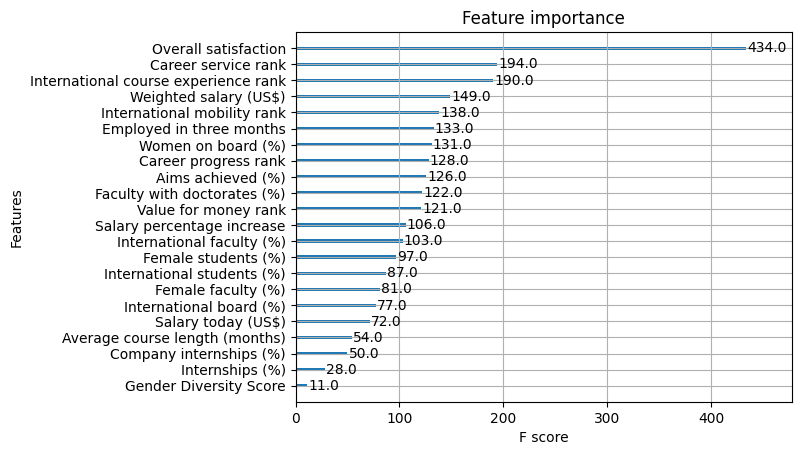

In [ ]:
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = df_dataset[metrics]
y = df_dataset['#']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBRegressor(objective ='reg:squarederror')
model.fit(X_train, y_train)

plot_importance(model)
plt.show()

# Get feature importances
importances = model.feature_importances_

# Sort features by importance
sorted_idx = importances.argsort()

# 3. Train model with XGBoost again with Bayesian Optimizaton
model = xgb.XGBRegressor(objective ='reg:squarederror', [parameters])



In [ ]:
# Install Bayesian-Optimization
!pip install bayesian-optimization

## 3.1. Using Bayesian Optimization to find parameters

Question: What are the best values for XGB's parameter (learning_rate, max_depth, n_estimators) to train this dataset?

In [ ]:
# Import important libraries
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
from bayes_opt import BayesianOptimization


# Create function to caculate mae, with input are parameters of XGB: learning_rate, max_depth, n_estimators
def evaluate_mae(learning_rate, max_depth, n_estimators):
    X = df_dataset[metrics]
    y = df_dataset['#']

    # Keep the same values for parameters
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    xgb_regressor = xgb.XGBRegressor(
        objective ='reg:squarederror',
        n_estimators=int(n_estimators),
        learning_rate=learning_rate,
        max_depth=int(max_depth),
        random_state=42
    )

    # Train the model
    xgb_regressor.fit(X_train, y_train)
    y_pred = xgb_regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    return -mae  # We return negative MAE because BayesianOptimization tries to maximize the function

# Define the bounds for the hyperparameters
pbounds = {
    'learning_rate': (0.01, 0.3),
    'max_depth': (3, 10),
    'n_estimators': (50, 500)
}

# Initialize Bayesian optimization
optimizer = BayesianOptimization(
    f=evaluate_mae,
    pbounds=pbounds,
    random_state=42,
)

# Optimize
optimizer.maximize(
    init_points=5,
    n_iter=25,
)

# Print the best hyperparameters
print(optimizer.max)

|   iter    |  target   | learni... | max_depth | n_esti... |
-------------------------------------------------------------
| 1         | -8.594    | 0.1186    | 9.655     | 379.4     |
| 2         | -7.805    | 0.1836    | 4.092     | 120.2     |
| 3         | -8.738    | 0.02684   | 9.063     | 320.5     |
| 4         | -6.934    | 0.2153    | 3.144     | 486.5     |
| 5         | -7.63     | 0.2514    | 4.486     | 131.8     |
| 6         | -8.457    | 0.3       | 10.0      | 203.1     |
| 7         | -6.98     | 0.2336    | 3.605     | 487.3     |
| 8         | -9.014    | 0.01      | 3.0       | 459.5     |
| 9         | -9.307    | 0.2745    | 9.711     | 480.5     |
| 10        | -7.07     | 0.09704   | 3.072     | 492.9     |
| 11        | -8.853    | 0.1585    | 7.87      | 499.4     |
| 12        | -8.603    | 0.08352   | 9.994     | 126.4     |
| 13        | -8.666    | 0.178     | 7.487     | 491.1     |
| 14        | -8.877    | 0.01      | 3.0       | 490.1     |
| 15    

## 3.2. Apply new parameter, train model with randomly combination of metrics
Goal is to find best combination with lowest MAE

In [ ]:
import itertools
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# List of metrics
metrics = metrics

# Function to evaluate MAE for a given set of metrics
def evaluate_mae(selected_metrics):
    X = df_dataset[metrics]
    y = df_dataset['#']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    xgb_regressor = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=486, learning_rate=0.1, max_depth=4, random_state=42)
    xgb_regressor.fit(X_train, y_train)

    #gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    #gb_regressor.fit(X_train, y_train)
    y_pred = xgb_regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    return mae

# Loop through different combinations of metrics and evaluate MAE
best_mae = float('inf')
best_combination = []

# Find combo of metrics with at least 5 metrics
for r in range(17, len(metrics) + 1):
    for subset in itertools.combinations(metrics, r):
        mae = evaluate_mae(list(subset))
        if mae < best_mae:
            best_mae = mae
            best_combination = subset

# Print the best combination and its MAE
print(f"Best combination of metrics: {best_combination}")
print(f"Lowest MAE: {best_mae}")